# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [3]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250707'
object = 'V462Lup'
channel = '3'

In [4]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [5]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:22.988000,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:24.408063,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:25.828125,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:27.248188,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:28.668251,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:42:04.070000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,12,L4,CLEAR,True
3962,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:42:36.680000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,13,L4,CLEAR,True
3963,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:09.393000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,14,L4,CLEAR,True
3964,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:42.257000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,15,L4,CLEAR,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [6]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs3/20250707_s4c3_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

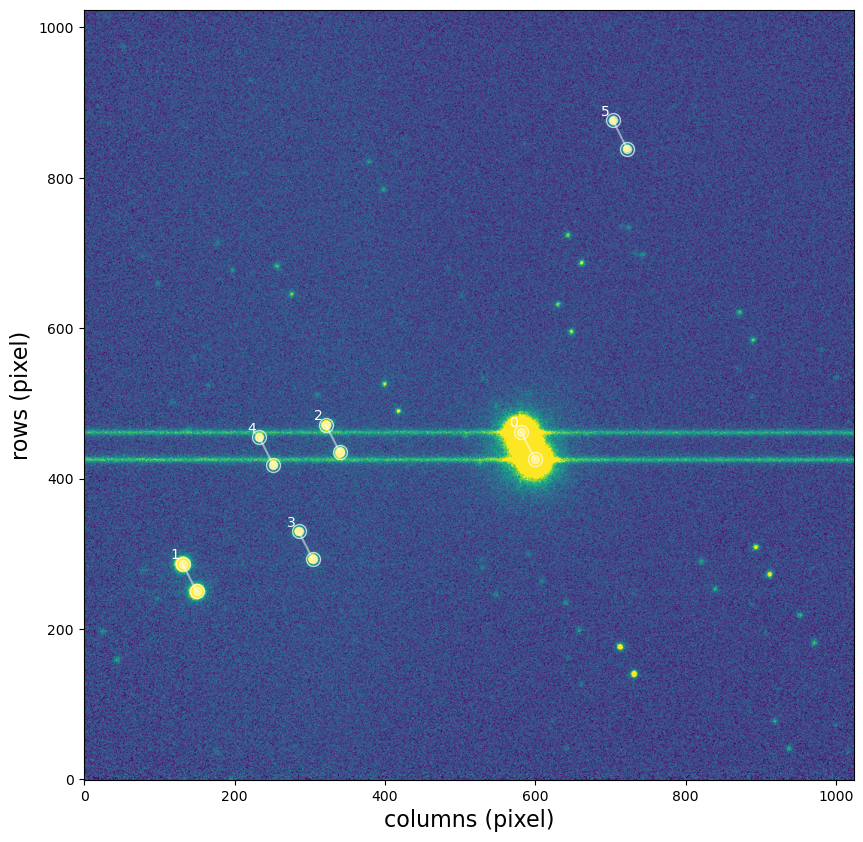

In [7]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [8]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.004748,-40.146106,599.524400,425.550114,6.426981,6.426981,-16.767936,0.001991,-10.588665,0.023980,10,0
1,1,227.059930,-40.163928,149.687249,249.898843,6.572238,6.572238,-13.336216,0.012154,-10.293009,0.018798,10,0
2,2,227.037166,-40.145880,339.967898,435.248645,5.830827,5.830827,-11.717446,0.039193,-10.383890,0.018272,10,0
3,3,227.041112,-40.159472,303.745341,293.411259,6.221917,6.221917,-11.293926,0.055068,-10.293368,0.017540,10,0
4,4,227.048043,-40.147744,251.708269,418.154171,5.764193,5.764193,-11.014999,0.069865,-10.349893,0.018288,10,0
5,5,226.991257,-40.106538,721.709857,838.938875,6.041887,6.041887,-10.729812,0.088334,-10.174674,0.018385,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

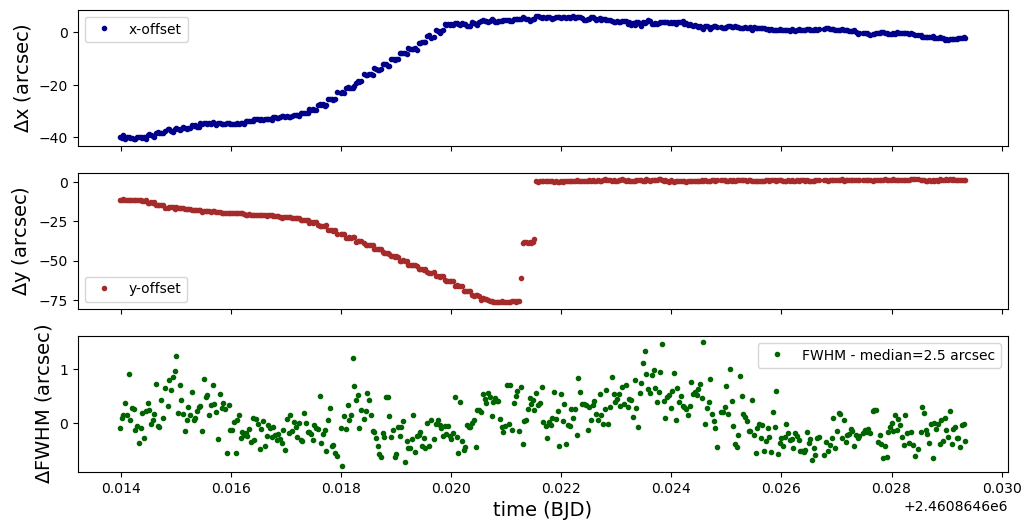

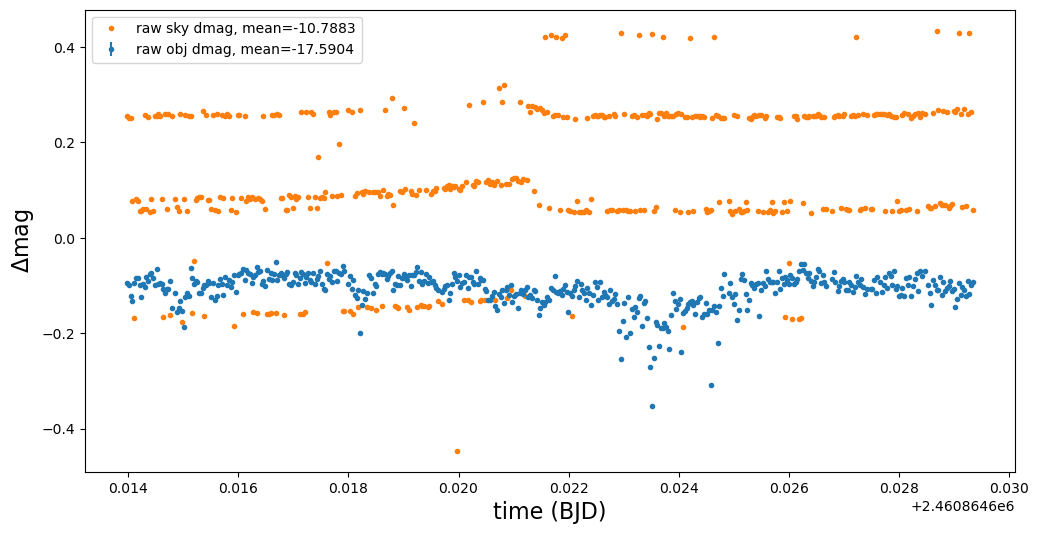

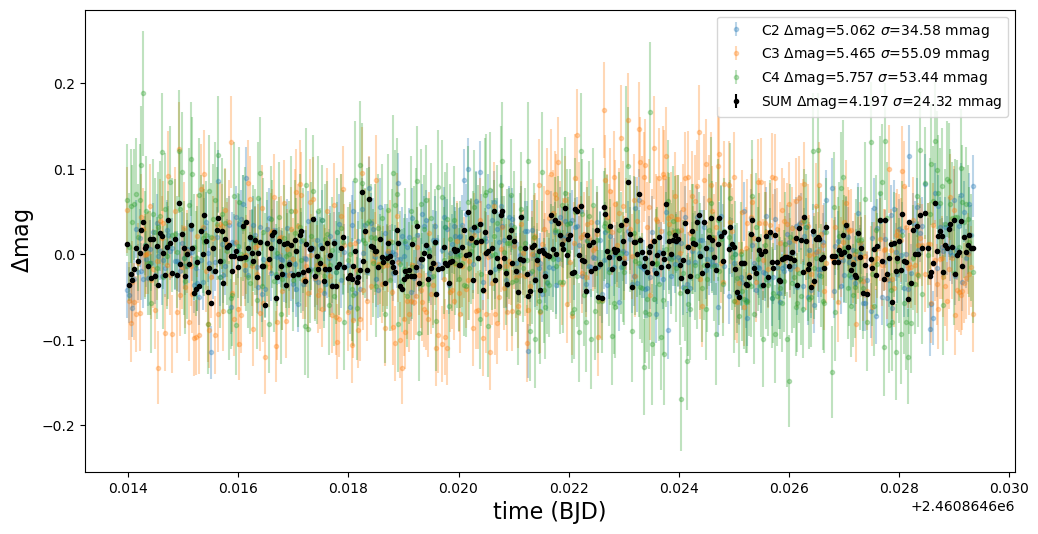

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
 2460864.613983347 590.3518702722181 ...  0.011879250242785133
 2460864.614015798 589.1018702722181 ...  -0.03636037767222433
 2460864.614046502 592.1018702722181 ...   -0.0228235024261636
2460864.6140769282 588.3518702722181 ... -0.029991851327045183
 2460864.614108118 590.8518702722181 ...  -0.01704273207625384
2460864.6141417846 589.8518702722181 ...  0.007222127776023157
 2460864.614172674 589.6018702722181 ... -0.007595612305257404
               ...               ... ...                   ...
 2460864.629152011 701.8518702722181 ...   -0.0139853896657538
 2460864.629182704 702.1018702722181 ...   0.02069367738696748
 2460864.629213986 702.8518702722181 ...  0.002983101636793606
 2460864.629245928 703.1018702722181 ...  0.010752301299785216
2460864.6292770603 703.1018702722181 ...  0.022248265937552247
  2460864.62930869 703.8518702722181 ...  0.00767694155

In [9]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [10]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs3/20250707_s4c3_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2907   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   3922   6R x 1955C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

Below we print one of the catalog extensions

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0477,EFE0477,FO0478,EFO0478,FE0478,EFE0478,FO0479,EFO0479,FE0479,EFE0479
0,2.0,10.0,0.0,227.004748,-40.146106,581.179340,461.695733,599.524400,425.550114,5.206349,...,5.640655e+06,9942.906884,5.142261e+06,9503.252968,5.733572e+06,10011.433608,5.152175e+06,9508.355490,5.786208e+06,10046.791470
1,2.0,10.0,1.0,227.059930,-40.163928,130.815667,286.325049,149.687249,249.898843,5.358551,...,2.267473e+05,2862.179930,2.110615e+05,2809.945612,2.333604e+05,2876.439568,2.146173e+05,2825.549591,2.400005e+05,2892.233013
2,2.0,10.0,2.0,227.037166,-40.145880,321.290581,471.695968,339.967898,435.248645,5.461387,...,5.008156e+04,2283.258995,4.523926e+04,2255.333609,5.539069e+04,2301.145173,4.365115e+04,2254.176189,5.237529e+04,2254.508270
3,2.0,10.0,3.0,227.041112,-40.159472,285.186716,329.758643,303.745341,293.411259,5.699601,...,3.946731e+04,2255.770727,3.186335e+04,2202.937717,3.997778e+04,2223.579077,3.498766e+04,2185.137033,4.103690e+04,2217.500310
4,2.0,10.0,4.0,227.048043,-40.147744,232.911831,454.647268,251.708269,418.154171,6.073822,...,2.734533e+04,2194.840604,2.434751e+04,2186.942602,2.943287e+04,2187.682099,2.447901e+04,2171.030229,3.101924e+04,2195.839127
5,2.0,10.0,5.0,226.991257,-40.106538,703.314520,876.202092,721.709857,838.938875,5.950156,...,2.441037e+04,2139.663012,1.958391e+04,2130.505471,2.206114e+04,2127.818485,1.968239e+04,2099.885306,2.550241e+04,2122.062261


Then we can print all column names to check the data available in each catalog

In [12]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0477', 'EFE0477', 'FO0478', 'EFO0478', 'FE0478', 'EFE0478', 'FO0479',
       'EFO0479', 'FE0479', 'EFE0479'],
      dtype='object', length=1955)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-09 17:06:20,772 astropop - INFO - Normalization disabled.  [__init__]


2025-10-09 17:06:20,772 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-09 17:06:20,796 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-09 17:06:20,796 | INFO | Source index: i=0 


2025-10-09 17:06:20,797 root - INFO - Source RA=227.00474764867536 Dec=-40.1461062812174 mag=-24.37311+-0.00006  [pipeline_lib]


2025-10-09 17:06:20,797 | INFO | Source RA=227.00474764867536 Dec=-40.1461062812174 mag=-24.37311+-0.00006


2025-10-09 17:06:20,798 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-10-09 17:06:20,798 | INFO | Best aperture radius: 20.0 pixels


2025-10-09 17:06:20,804 root - INFO - Polarization in Q: -0.0010+-0.0002  [pipeline_lib]


2025-10-09 17:06:20,804 | INFO | Polarization in Q: -0.0010+-0.0002


2025-10-09 17:06:20,804 root - INFO - Polarization in U: -0.0016+-0.0003  [pipeline_lib]


2025-10-09 17:06:20,804 | INFO | Polarization in U: -0.0016+-0.0003


2025-10-09 17:06:20,805 root - INFO - Polarization in V: -0.0000+-0.0001  [pipeline_lib]


2025-10-09 17:06:20,805 | INFO | Polarization in V: -0.0000+-0.0001


2025-10-09 17:06:20,806 root - INFO - Total linear polarization p: 0.0019+-0.0002  [pipeline_lib]


2025-10-09 17:06:20,806 | INFO | Total linear polarization p: 0.0019+-0.0002


2025-10-09 17:06:20,807 root - INFO - Angle of polarization theta: 118+-4 deg  [pipeline_lib]


2025-10-09 17:06:20,807 | INFO | Angle of polarization theta: 118+-4 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-09 17:06:20,808 root - INFO - Free constant k: 0.8925080435373844+-0.0  [pipeline_lib]


2025-10-09 17:06:20,808 | INFO | Free constant k: 0.8925080435373844+-0.0


2025-10-09 17:06:20,809 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-10-09 17:06:20,809 | INFO | Zero of polarization: 27.2+-0.0


2025-10-09 17:06:20,810 root - INFO - RMS of zi residuals: 0.002027118455718059  [pipeline_lib]


2025-10-09 17:06:20,810 | INFO | RMS of zi residuals: 0.002027118455718059


2025-10-09 17:06:20,810 root - INFO - Reduced chi-square (n=480.0, DOF=477.0): 2.42  [pipeline_lib]


2025-10-09 17:06:20,810 | INFO | Reduced chi-square (n=480.0, DOF=477.0): 2.42


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-09 17:06:20,911 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:06:20,911 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:06:20,916 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:06:20,916 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:06:21,144 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:06:21,144 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:06:21,150 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:06:21,150 | INFO | Substituting symbol \perp from STIXGeneral


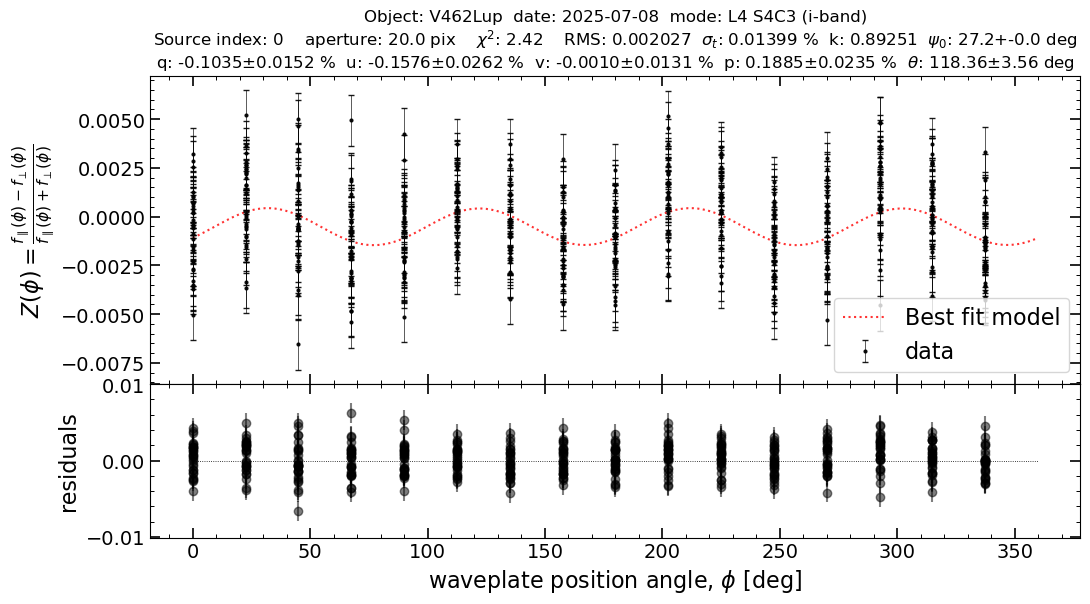

In [13]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [14]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs3/20250707_s4c3_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 480
MAG : -24.37311+-0.00006
RA : 227.00474764867536
DEC : -40.1461062812174
FWHM : 5.206349028409852
X1 : 581.1793403056411
Y1 : 461.6957329260054
X2 : 599.524400238795
Y2 : 425.55011430297765
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [15]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.19+-0.02 %  Angle of polarization: 118+-4 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [16]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [17]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

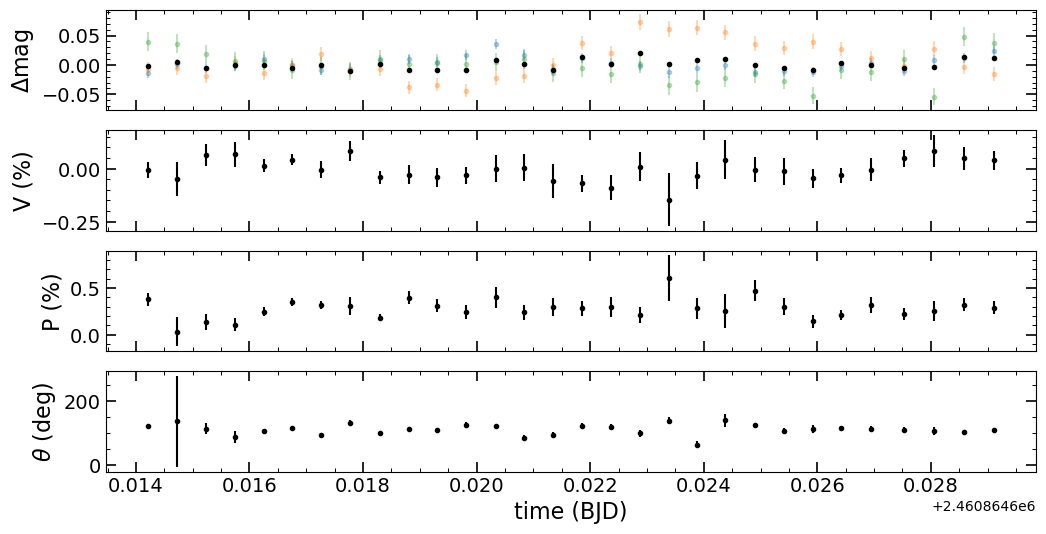

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.013171415718713497,0.008340219474275434,-0.006646708146676339,0.011757242896559387,0.03967719715968254,0.016069768315368948,2460864.614218029,581.1793403056411,461.6957329260054,599.524400238795,425.55011430297765,5.367142163561265,-20.604693766007188,0.0003439354961568471,-16.40886804134658,0.021579494902357308,-0.001073754560504625,0.003804982364240448,0.0006879317818509191,120.7184202647948,5.170812129339208
0.0008799391315390537,0.008558726280333445,-0.005676336928011061,0.011980211058499318,0.0363660061651947,0.016281222618855635,2460864.6147301346,583.6793403056411,455.6957329260054,602.024400238795,419.55011430297765,5.941673775276241,-20.58631255658401,0.00034711027815745023,-16.384549302043713,0.021942971673795428,0.004863775319183361,0.0003181546444406414,0.0015895308321287672,135.3597038922319,142.88831734268268
-0.004664170802075596,0.008473826284874838,-0.018293360175142048,0.011773535276586835,0.018521844145582556,0.015920939367129835,2460864.615240816,591.1793403056411,449.1957329260054,609.524400238795,413.05011430297765,5.690863928825079,-20.595215564180243,0.00034552280091657315,-16.4040800765777,0.0215299794967212,-0.005763991618568554,0.0013660506344910226,0.0008387093418835291,112.64706127086518,17.55944221409208
-0.0014615192112410469,0.008445009986531015,0.002545302070523725,0.01193661641419157,0.006143977308819437,0.01565257349540727,2460864.6157474355,596.9293403056411,442.1957329260054,615.274400238795,406.05011430297765,5.845673358589961,-20.60061828311982,0.000344681514311681,-16.40436861118634,0.0214113905686286,-0.0006498072876297556,0.001071431332349804,0.0006890011462381525,86.83241748618491,18.391689870777157
0.010895200017407625,0.008409199718775724,-0.013912155695712691,0.011538528764893669,0.007422346660805879,0.015446533211496844,2460864.616253314,596.4293403056411,437.1957329260054,614.774400238795,401.05011430297765,4.911707543550827,-20.621822652806582,0.00034112428850829006,-16.42490487886214,0.021026140322983212,1.829472332914861e-05,0.0024807598330898457,0.0004610058304615467,105.55299334742854,5.314809831783794
-0.0006392036708549043,0.008317186929093437,0.0007039866213665036,0.011718292882376179,-0.008985112071207446,0.015190279505691684,2460864.6167546734,600.9293403056411,434.1957329260054,619.274400238795,398.05011430297765,4.6702643066003775,-20.62082341565416,0.000341275306406852,-16.42836159319135,0.020901893967948896,-0.004437656758302211,0.0034768150469287966,0.0004498463503557011,113.37072980695719,3.7003997758056566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.011662275075507544,0.00825296066209672,0.03975717899684117,0.012117727802512687,-0.052319782693378336,0.014599329946455498,2460864.6259215097,704.9293403056411,498.6957329260054,723.274400238795,462.55011430297765,4.643706213383955,-20.6097743415145,0.0003430248353927231,-16.420847549500788,0.02068183075934741,-0.007972687207402629,0.001416394756674814,0.0006874955892589693,111.56162935720094,13.881987179172219
-0.002221926528803486,0.008263753330669782,0.027942615908171042,0.011904201749048427,-0.009369095733206656,0.015043396667979245,2460864.6264179274,703.9293403056411,499.6957329260054,722.274400238795,463.55011430297765,4.377147576013312,-20.623089302864845,0.00034086829327034695,-16.42301080931621,0.020879531798445615,0.0031790143275216565,0.0021203753707200097,0.000562562062156295,113.89149621566638,7.587937117099531


In [18]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)